<font size="+3.8">Foxf2 Expression per Cell Type</font>  
<font size="+1.5"></font>  

sfrerich

Aim: Combine and plot Foxf2 expression from processed scRNA-seq studies. Processing see separate scripts.

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import glob
from datetime import date
from matplotlib.pyplot import rc_context
import seaborn as sns

In [2]:
sc.settings.verbosity = 3

In [3]:
main_dir='/run/user/1000/gvfs/smb-share:server=138.245.4.35,share=bd-dichgans/SF' # Linux
main_dir='\\\isdsynnas.srv.med.uni-muenchen.de\BD-Dichgans\SF' # Win

# Foxf2

## Load data

In [243]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Foxf2_summarized' 
all_files = glob.glob(os.path.join(path , "*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\20230228_Winkler2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\20230227_Vanlandewijck2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\20230228_Zeisel2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\20230228_Yang2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\20230301_TabulaMuris2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\20230301_Heindl2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\20230301_Saunders2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenche

In [244]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [245]:
all

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
0,ECs,0.291276,0.107273,FOXF2,Winkler2022,Human,4950
1,Fibroblasts,0.403376,0.153991,FOXF2,Winkler2022,Human,3721
2,Fibromyocytes,0.033961,0.021365,FOXF2,Winkler2022,Human,4353
3,Pericytes,1.000000,0.355623,FOXF2,Winkler2022,Human,329
4,SMCs,0.000000,0.010474,FOXF2,Winkler2022,Human,41150
...,...,...,...,...,...,...,...
105,OPCs,0.002446,0.000914,Foxf2,Ximerakis2019,Mouse,2187
106,Oligos,0.001928,0.000888,Foxf2,Ximerakis2019,Mouse,12384
107,Pericytes,0.885806,0.417687,Foxf2,Ximerakis2019,Mouse,735
108,SMCs,1.000000,0.547325,Foxf2,Ximerakis2019,Mouse,243


In [246]:
all.source.unique()

array(['Winkler2022', 'Vanlandewijck2018', 'Zeisel2018', 'Yang2022',
       'TabulaMuris2018', 'Heindl2022', 'Saunders2018', 'Siletti2022',
       'Garcia2022', 'TabulaMurisSenis2020', 'Ximerakis2019'],
      dtype=object)

In [247]:
all.clusters.unique().tolist()

['ECs',
 'Fibroblasts',
 'Fibromyocytes',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Microglia',
 'Oligos',
 'Ependymal cells',
 'Olfactory ensheathing cells',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Macrophages',
 'OPCs',
 'Leptomeningeal cells',
 'T cells',
 'Unknown',
 'Neuronal stem cells',
 'Immune_Other',
 'Neurogenesis',
 'Choroid plexus epithelial cells',
 'Macrophages',
 'NK/T cells',
 'Neuroepithelial cells',
 'SMCs/Pericytes',
 'Neural stem cells',
 'VLMCs']

## Format

### Remove celltypes

In [248]:
# remove celltypes which are only available in 1 group
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'NK/T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']
all = all[all.clusters != 'Neuroepithelial cells']
all = all[all.clusters != 'VLMCs']
all = all[all.clusters != 'Leptomeningeal cells']
all = all[all.clusters != 'Olfactory ensheathing cells']

In [ ]:
all = all[all.clusters != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters != 'Olfactory ensheathing glia']
all = all[all.clusters != 'Hypendymal cells']

### Rename Oligos

In [249]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [250]:
all.clusters.unique().tolist()

['ECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Microglia',
 'Oligodendrocytes',
 'Ependymal cells',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Macrophages',
 'OPCs',
 'Neuronal stem cells',
 'Neurogenesis',
 'Macrophages',
 'SMCs/Pericytes',
 'Neural stem cells']

In [251]:
all = all.replace("Microglia","Microglia/Mφ")

In [252]:
all = all.replace("Macrophages","Microglia/Mφ")

In [253]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [254]:
all.clusters.unique().tolist()

['ECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'Ependymal cells',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'OPCs',
 'Neuronal stem cells',
 'Neurogenesis',
 'SMCs/Pericytes',
 'Neural stem cells']

### SMCs/Pericytes

In [255]:
all[all.clusters=="SMCs/Pericytes"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
96,SMCs/Pericytes,0.369789,0.390496,Foxf2,TabulaMurisSenis2020,Mouse,484


In [256]:
all = all.replace("SMCs/Pericytes","SMCs") # rather SMCs than pericytes, see TabulaMurisSenis2020 pp script

### Group Neuroblasts/Neuronal stem cells

In [257]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [258]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")
all = all.replace("Neural stem cells","Neuroblasts/NSCs")

In [259]:
all[all.clusters=="Neuroblasts/NSCs"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
18,Neuroblasts/NSCs,0.000000,0.000000,Foxf2,Zeisel2018,Mouse,5466
42,Neuroblasts/NSCs,0.000000,0.000000,Foxf2,TabulaMuris2018,Mouse,36
60,Neuroblasts/NSCs,0.001688,0.000499,Foxf2,Saunders2018,Mouse,4008
92,Neuroblasts/NSCs,0.018664,0.010309,Foxf2,TabulaMurisSenis2020,Mouse,97


### Rename ECs

In [260]:
# rename ECs to Endothelial cells

In [261]:
all2 = all

In [262]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [263]:
all2.clusters.unique().tolist()

['Endothelial cells',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'Ependymal cells',
 'Neurons',
 'Neuroblasts/NSCs',
 'OPCs',
 'Neural stem cells']

In [264]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "TabulaMurisSenis2020", "Ximerakis2019","Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [265]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [266]:
all2 = all2.sort_values("clusters")

### Rename studies

In [267]:
all2

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
97,Astrocytes,0.000600,0.000289,Foxf2,Ximerakis2019,Mouse,6931
66,Astrocytes,0.000600,0.000356,FOXF2,Siletti2022,Human,163066
86,Astrocytes,0.000401,0.004644,Foxf2,TabulaMurisSenis2020,Mouse,646
24,Astrocytes,0.046944,0.001307,FOXF2,Yang2022,Human,9943
5,Astrocytes,0.000066,0.044000,Foxf2,Vanlandewijck2018,Mouse,250
...,...,...,...,...,...,...,...
26,Ependymal cells,0.034462,0.002260,FOXF2,Yang2022,Human,885
88,Ependymal cells,0.000000,0.000000,Foxf2,TabulaMurisSenis2020,Mouse,55
69,Ependymal cells,0.002025,0.000680,FOXF2,Siletti2022,Human,5882
13,Ependymal cells,0.000000,0.000000,Foxf2,Zeisel2018,Mouse,1419


In [268]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [269]:
all2 = all2.replace("Heindl2022","Own data (unpublished)")

In [270]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [271]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [272]:
all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")

In [278]:
all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")

In [273]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [274]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [275]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [276]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [277]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

## Heatmap

In [279]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [280]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_16740\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


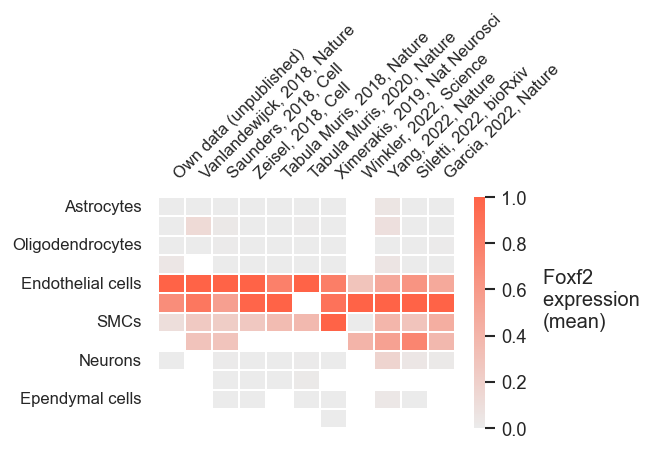

In [281]:
with rc_context({'figure.figsize': (4,2.5), 'figure.dpi': 120}):
    pl = sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None);
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title='Foxf2 \nexpression \n(mean)', frameon=False)
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.png', dpi=500, bbox_inches='tight')
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.svg', dpi=500, bbox_inches='tight')
    plt.show()

## Dotplot

In [282]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_16740\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [283]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [284]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [497]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(15, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(10,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title="Foxf2", # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

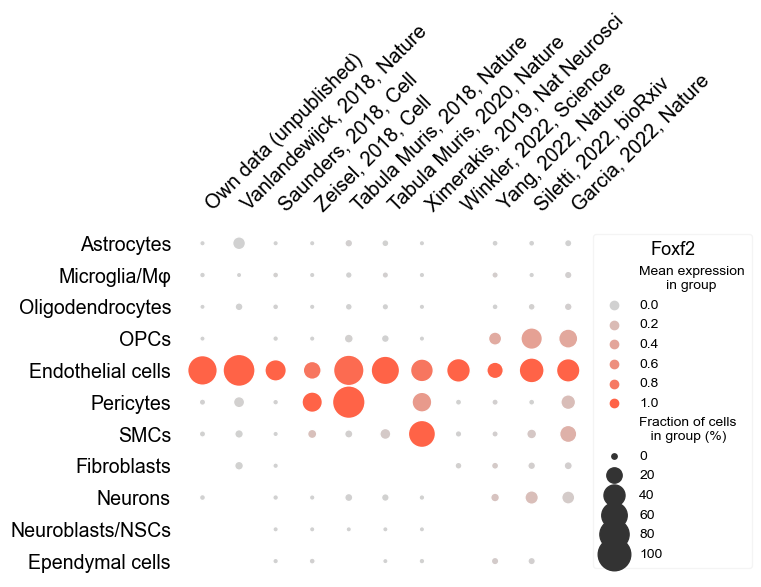

In [498]:
plt.show()

In [75]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_a.png', dpi=500)

In [76]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_a.svg', dpi=500)

In [48]:
# format legend as in sc.pl.dotplot()?

In [49]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(0, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.5,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title="Foxf2", # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

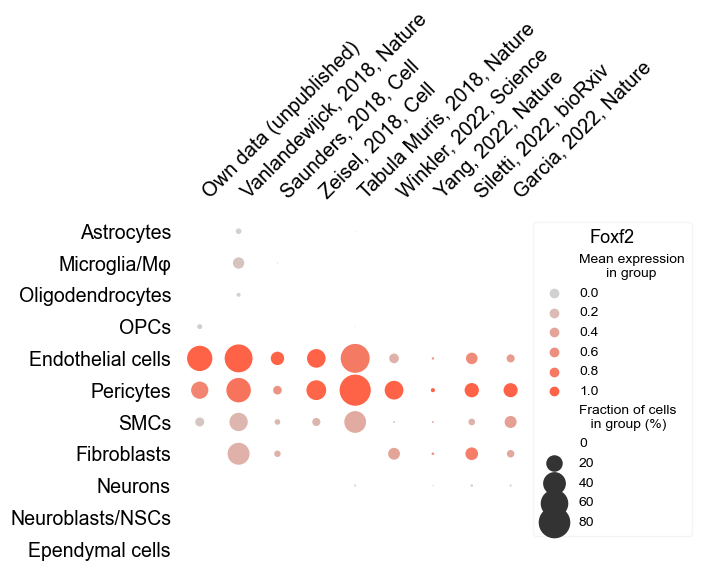

In [50]:
plt.show()

Plot shows no dot if fraction of cells is 0

In [51]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_b.png', dpi=500)

In [52]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_b.svg', dpi=500)

## Cell Numbers

In [53]:
# Format table
all5=all2.set_index(['clusters','source'])['cell_number'].unstack().reset_index() # unmelt
# change row order to represent groupings
all5.index = all5.clusters
all5=all5.reindex(list(all2.clusters.unique()))
all5=all5.drop("clusters",axis=1)
#all4.sort_values("clusters")
all5 = all5.fillna(0)
all5 = all5.astype(int)
# add marginal frequencies
all5.loc["Total"] = all5.sum(skipna=True)
all5['Total'] = all5[list(all5.columns)].sum(axis=1)
all5

source,Own data (unpublished),"Vanlandewijck, 2018, Nature","Saunders, 2018, Cell","Zeisel, 2018, Cell","Tabula Muris, 2018, Nature","Winkler, 2022, Science","Yang, 2022, Nature","Siletti, 2022, bioRxiv","Garcia, 2022, Nature",Total
clusters,,,,,,,,,,
Astrocytes,783,250,51571,19755,433,0,9943,163066,11954,257755
Microglia/Mφ,1360,14,6129,6744,4365,0,1142,91838,8164,119756
Oligodendrocytes,54,155,113209,26243,1186,0,8528,494966,29428,673769
OPCs,28,0,12252,733,202,0,1509,105734,5844,126302
Endothelial cells,338,1528,40105,2334,625,4950,24982,5165,6561,86588
Pericytes,92,1088,5342,4156,14,329,17561,3693,4922,37197
SMCs,95,297,7667,1575,132,41150,4669,1074,1039,57698
Fibroblasts,0,86,3993,0,0,3721,2032,9156,4147,23135
Neurons,753,0,399331,63512,196,0,933,2455885,23968,2944578


In [54]:
all5.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\'+date.today().strftime("%Y%m%d")+'_number_of_cells.csv',sep=";")

## Looking at AV zonation

### Load data

In [242]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Foxf2_summarized\\incl_zonation' 
all_files = glob.glob(os.path.join(path , "*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\incl_zonation\\20230227_Vanlandewijck2018_incl_zonation.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\incl_zonation\\20230228_Winkler2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\incl_zonation\\20230228_Yang2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\incl_zonation\\20230302_Garcia2022_incl_zonation_normalized.csv']

In [243]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [244]:
all.source.unique()

array(['Vanlandewijck2018', 'Winkler2022', 'Yang2022', 'Garcia2022'],
      dtype=object)

In [245]:
all.clusters2.unique().tolist()

['Astrocytes',
 'ECs_Arterial',
 'ECs_Capillary',
 'ECs_Venous',
 'ECs_non_AV',
 'Fibroblasts',
 'Microglia',
 'Oligos',
 'Pericytes',
 'SMCs',
 'Fibromyocytes',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'T cells',
 'aECs',
 'capECs',
 'vECs']

### Format

### Remove celltypes

In [246]:
# remove celltypes which are only available in 1 group
all = all[all.clusters2 != "Unknown"]
all = all[all.clusters2 != 'Immune_Other']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'Leptomeningeal cells']
all = all[all.clusters2 != 'Fibromyocytes']
all = all[all.clusters2 != 'T cells']
all = all[all.clusters2 != 'Choroid plexus epithelial cells']
all = all[all.clusters2 != 'ECs_non_AV']

### Rename Oligos

In [247]:
all = all.replace("Oligos","Oligodendrocytes")

### Match AV naming

In [248]:
all = all.replace("ECs_Arterial","aECs")

In [249]:
all = all.replace("ECs_Capillary","capECs")

In [250]:
all = all.replace("ECs_Venous","vECs")

### Match Microglia naming

In [251]:
all.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Microglia',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs']

In [252]:
all = all.replace("Microglia","Microglia/Mφ")

In [253]:
all = all.replace("Macrophages","Microglia/Mφ")

In [254]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [255]:
all.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Neurons',
 'OPCs']

### Complement missing celltypes 

In [256]:
all2 = all

In [257]:
# complement missing celltypes as NA rows

In [258]:
all_celltypes = pd.Series(all2.clusters2.unique())
all_celltypes

0           Astrocytes
1                 aECs
2               capECs
3                 vECs
4          Fibroblasts
5         Microglia/Mφ
6     Oligodendrocytes
7            Pericytes
8                 SMCs
9      Ependymal cells
10             Neurons
11                OPCs
dtype: object

In [259]:
all2.source.unique()

array(['Vanlandewijck2018', 'Winkler2022', 'Yang2022', 'Garcia2022'],
      dtype=object)

In [260]:
all2.loc[len(all2)]

clusters2                  aECs
mean_expression        0.437518
fraction_of_cells      0.066586
gene                      FOXF2
source               Garcia2022
organism                  Human
cell_number                 826
Name: 38, dtype: object

In [261]:
for s in all2.source.unique():
    # find cell types missing per source
    key_diff = set(all_celltypes).difference(all2[all2.source==s].clusters2)
    where_diff = all_celltypes.isin(key_diff)
    missing_celltypes=all_celltypes[where_diff]
    # append these to all2 as NA row
    for m in missing_celltypes:
        all2.loc[len(all2)] = [m,None,None,None,s,None,None]

#assert(len(all2) == len(all2.clusters2.unique())*len(all2.source.unique()))

In [262]:
len(all2.clusters2.unique())

12

In [263]:
len(all2.source.unique())

4

In [264]:
len(all2)

38

In [265]:
all2

,clusters2,mean_expression,fraction_of_cells,gene,source,organism,cell_number
0,Astrocytes,0.000057,0.044000,Foxf2,Vanlandewijck2018,Mouse,250.0
1,aECs,0.810197,0.816121,Foxf2,Vanlandewijck2018,Mouse,397.0
2,capECs,1.000000,0.834568,Foxf2,Vanlandewijck2018,Mouse,405.0
3,vECs,0.707675,0.748322,Foxf2,Vanlandewijck2018,Mouse,298.0
5,Fibroblasts,0.253919,0.476744,Foxf2,Vanlandewijck2018,Mouse,86.0
6,Microglia/Mφ,0.108936,0.142857,Foxf2,Vanlandewijck2018,Mouse,14.0
7,Oligodendrocytes,0.000000,0.025806,Foxf2,Vanlandewijck2018,Mouse,155.0
8,Pericytes,0.738566,0.585478,Foxf2,Vanlandewijck2018,Mouse,1088.0
9,SMCs,0.213667,0.340067,Foxf2,Vanlandewijck2018,Mouse,297.0
10,aECs,0.388578,0.136868,FOXF2,Winkler2022,Human,2886.0


### Set order of axes

In [266]:
all2.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Neurons',
 'OPCs']

In [267]:
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Winkler2022", "Yang2022", "Garcia2022"])

In [268]:
all2.clusters2 = pd.Categorical(all2.clusters2, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "aECs", "capECs", "vECs", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [269]:
all2 = all2.sort_values("clusters2")

### Rename studies

In [270]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [271]:
all2 = all2.replace("Heindl2022","Own data (unpublished)")

In [272]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [273]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [274]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [275]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [276]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [277]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [278]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

### Heatmap

In [279]:
# Format table
all4=all2.set_index(['clusters2','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters2
all4=all4.reindex(list(all2.clusters2.unique()))
all4=all4.drop("clusters2",axis=1)
#all4.sort_values("clusters")
#all4

In [280]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_13056\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


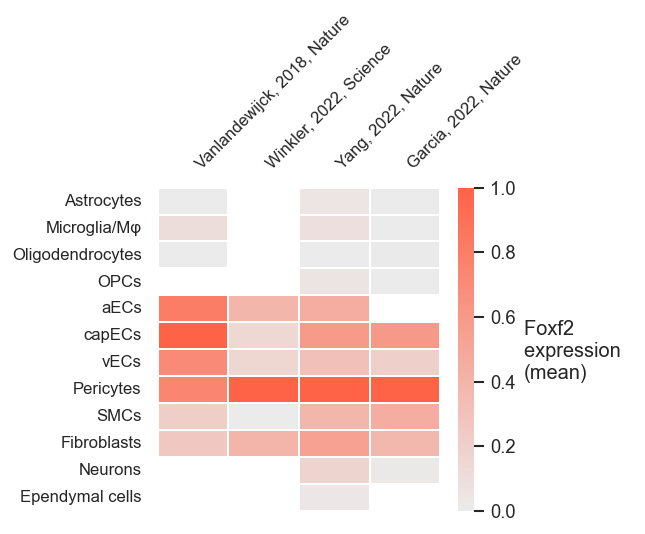

In [281]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title='Foxf2 \nexpression \n(mean)', frameon=False)
    plt.show()

### Dotplot

In [282]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_13056\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [283]:
#all2.columns = ['clusters', 'Mean', 'Fraction of cells', 'gene', 'source','organism', 'cell_number']

In [284]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [285]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [302]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8,5.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(2,1), title="Foxf2", # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

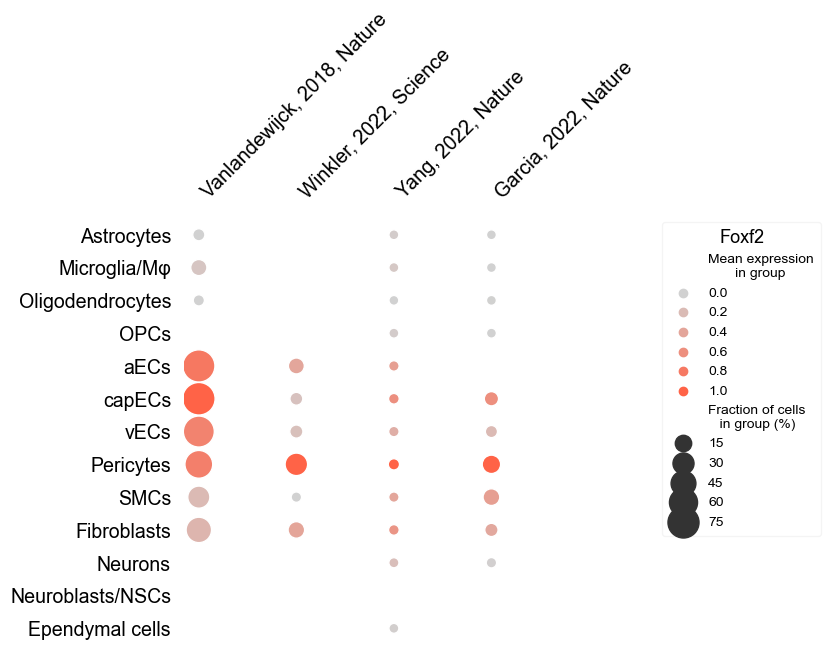

In [303]:
plt.show()

In [304]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_incl_AV_zonation.png', dpi=500)

In [305]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_incl_AV_zonation.svg', dpi=500)

## Cell Numbers

In [306]:
# Format table
all5=all2.set_index(['clusters','source'])['cell_number'].unstack().reset_index() # unmelt
# change row order to represent groupings
all5.index = all5.clusters
all5=all5.reindex(list(all2.clusters.unique()))
all5=all5.drop("clusters",axis=1)
#all4.sort_values("clusters")
all5 = all5.fillna(0)
all5 = all5.astype(int)
# add marginal frequencies
all5.loc["Total"] = all5.sum(skipna=True)
all5['Total'] = all5[list(all5.columns)].sum(axis=1)
all5

source,"Vanlandewijck, 2018, Nature","Winkler, 2022, Science","Yang, 2022, Nature","Garcia, 2022, Nature",Total
clusters,,,,,
Astrocytes,250,0,9943,11954,22147
Microglia/Mφ,14,0,1142,8164,9320
Oligodendrocytes,155,0,8528,29428,38111
OPCs,0,0,1509,5844,7353
aECs,397,2886,4486,0,7769
capECs,405,165,13357,4160,18087
vECs,298,1899,7139,1575,10911
Pericytes,1088,329,17561,4932,23910
SMCs,297,41150,4669,1029,47145


In [307]:
all5.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\'+date.today().strftime("%Y%m%d")+'_number_of_cells_incl_AV_zonation.csv',sep=";")

# Other genes: Tek

In [451]:
gene = "Tek"

## Load data

In [452]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized' 
all_files = glob.glob(os.path.join(path , "2023*_Tek_*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_Tek_Zeisel2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230227_Tek_Vanlandewijck2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_TEK_Winkler2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_TEK_Yang2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230301_Tek_Heindl2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230301_Tek_Saunders2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230302_TE

In [453]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [454]:
all

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
0,Astrocytes,0.002218,0.001063,Tek,Zeisel2018,Mouse,19755
1,Ependymal cells,0.011373,0.007047,Tek,Zeisel2018,Mouse,1419
2,Olfactory ensheathing cells,0.000000,0.000492,Tek,Zeisel2018,Mouse,2031
3,Pericytes,1.000000,0.374158,Tek,Zeisel2018,Mouse,4156
4,Endothelial cells,0.820371,0.280634,Tek,Zeisel2018,Mouse,2334
...,...,...,...,...,...,...,...
108,Olfactory ensheathing glia,0.000000,0.000000,Tek,Ximerakis2019,Mouse,892
109,Oligos,0.001756,0.001453,Tek,Ximerakis2019,Mouse,12384
110,Pericytes,0.499612,0.351020,Tek,Ximerakis2019,Mouse,735
111,SMCs,1.000000,0.683128,Tek,Ximerakis2019,Mouse,243


In [455]:
all.source.unique()

array(['Zeisel2018', 'Vanlandewijck2018', 'Winkler2022', 'Yang2022',
       'Heindl2022', 'Saunders2018', 'Siletti2022', 'TabulaMuris2018',
       'Garcia2022', 'TabulaMurisSenis2020', 'Ximerakis2019'],
      dtype=object)

## Format

### Remove celltypes

In [456]:
# remove celltypes which are only available in 1 group
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'NK/T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']
all = all[all.clusters != 'Neuroepithelial cells']
all = all[all.clusters != 'VLMCs']
all = all[all.clusters != 'Leptomeningeal cells']
all = all[all.clusters != 'Olfactory ensheathing cells']

In [457]:
all = all[all.clusters != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters != 'Olfactory ensheathing glia']
all = all[all.clusters != 'Hypendymal cells']

### Rename Oligos

In [458]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [459]:
all.clusters.unique().tolist()

['Astrocytes',
 'Ependymal cells',
 'Pericytes',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Macrophages',
 'Oligodendrocytes',
 'SMCs',
 'OPCs',
 'ECs',
 'Fibroblasts',
 'Microglia',
 'Neurogenesis',
 'Macrophages',
 'Neuronal stem cells',
 'SMCs/Pericytes',
 'Neural stem cells']

In [460]:
all = all.replace("Microglia","Microglia/Mφ")

In [461]:
all = all.replace("Macrophages","Microglia/Mφ")

In [462]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [463]:
all.clusters.unique().tolist()

['Astrocytes',
 'Ependymal cells',
 'Pericytes',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'SMCs',
 'OPCs',
 'ECs',
 'Fibroblasts',
 'Neurogenesis',
 'Neuronal stem cells',
 'SMCs/Pericytes',
 'Neural stem cells']

### SMCs/Pericytes

In [464]:
all[all.clusters=="SMCs/Pericytes"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
96,SMCs/Pericytes,0.075376,0.088843,Tek,TabulaMurisSenis2020,Mouse,484


In [465]:
all = all.replace("SMCs/Pericytes","SMCs") # rather SMCs than pericytes, see TabulaMurisSenis2020 pp script

### Group Neuroblasts/Neuronal stem cells

In [466]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [467]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")
all = all.replace("Neural stem cells","Neuroblasts/NSCs")

In [468]:
all[all.clusters=="Neuroblasts/NSCs"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
6,Neuroblasts/NSCs,0.000221,0.000549,Tek,Zeisel2018,Mouse,5466
50,Neuroblasts/NSCs,0.000000,0.000499,Tek,Saunders2018,Mouse,4008
74,Neuroblasts/NSCs,0.000000,0.000000,Tek,TabulaMuris2018,Mouse,36
92,Neuroblasts/NSCs,0.000000,0.000000,Tek,TabulaMurisSenis2020,Mouse,97
105,Neuroblasts/NSCs,0.000000,0.000000,Tek,Ximerakis2019,Mouse,166


### Rename ECs

In [469]:
# rename ECs to Endothelial cells

In [470]:
all2 = all

In [471]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [472]:
all2.clusters.unique().tolist()

['Astrocytes',
 'Ependymal cells',
 'Pericytes',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts/NSCs',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'SMCs',
 'OPCs',
 'Fibroblasts']

In [473]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "TabulaMurisSenis2020", "Ximerakis2019","Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [474]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [475]:
all2 = all2.sort_values("clusters")

### Rename studies

In [476]:
all2

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
0,Astrocytes,0.002218,0.001063,Tek,Zeisel2018,Mouse,19755
56,Astrocytes,0.003129,0.007764,TEK,Siletti2022,Human,163066
45,Astrocytes,0.001185,0.001202,Tek,Saunders2018,Mouse,51571
76,Astrocytes,0.016723,0.030023,Tek,TabulaMuris2018,Mouse,433
35,Astrocytes,0.000603,0.001277,Tek,Heindl2022,Mouse,783
...,...,...,...,...,...,...,...
59,Ependymal cells,0.017392,0.025502,TEK,Siletti2022,Human,5882
88,Ependymal cells,0.000000,0.000000,Tek,TabulaMurisSenis2020,Mouse,55
47,Ependymal cells,0.001852,0.002473,Tek,Saunders2018,Mouse,2022
100,Ependymal cells,0.007038,0.003650,Tek,Ximerakis2019,Mouse,274


In [477]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [478]:
all2 = all2.replace("Heindl2022","Own data (unpublished)")

In [479]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [480]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [481]:
all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")

In [482]:
all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")

In [483]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [484]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [485]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [486]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [487]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

## Heatmap

In [488]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [489]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_16740\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


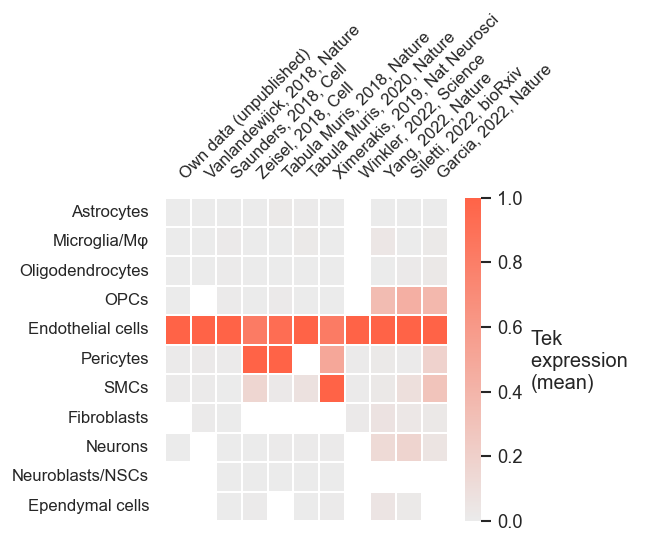

In [490]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.show()

## Dotplot

In [491]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_16740\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [492]:
#all2.columns = ['clusters', 'Mean', 'Fraction of cells', 'gene', 'source','organism', 'cell_number']

In [493]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [494]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [495]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.5,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

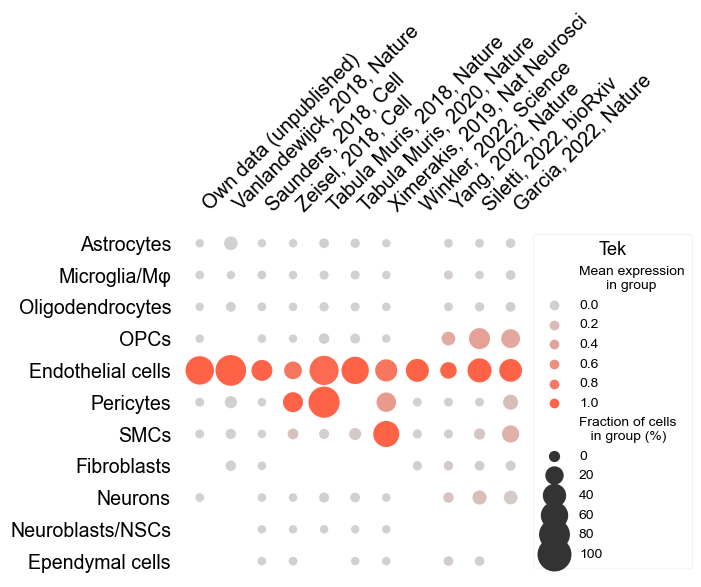

In [496]:
plt.show()

In [555]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_a.png', dpi=500)

In [556]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_a.svg', dpi=500)

In [557]:
# format legend as in scanpy.pl.dotplot() manually
# use colorbar from heatmap above

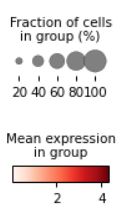

In [558]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(0, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.5,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

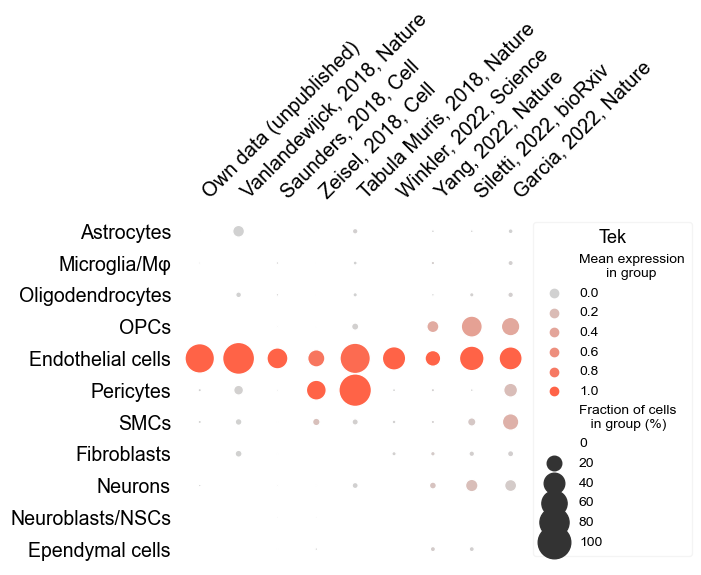

In [559]:
plt.show()

Plot shows no dot if fraction of cells is 0

In [560]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_b.png', dpi=500)

In [561]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_b.svg', dpi=500)

# Other genes: Foxo1

In [358]:
gene = "Foxo1"

## Load data

In [359]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized' 
all_files = glob.glob(os.path.join(path , "*_Foxo1_*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_FOXO1_Winkler2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230227_Foxo1_Vanlandewijck2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_Foxo1_Zeisel2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_FOXO1_Yang2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230301_Foxo1_Heindl2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230302_FOXO1_Siletti2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\

In [360]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [361]:
all

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
0,ECs,1.000000,0.494949,FOXO1,Winkler2022,Human,4950
1,Fibroblasts,0.460878,0.349368,FOXO1,Winkler2022,Human,3721
2,Fibromyocytes,0.164828,0.218929,FOXO1,Winkler2022,Human,4353
3,Pericytes,0.000000,0.148936,FOXO1,Winkler2022,Human,329
4,SMCs,0.007659,0.163183,FOXO1,Winkler2022,Human,41150
...,...,...,...,...,...,...,...
108,Olfactory ensheathing glia,1.000000,0.437220,Foxo1,Ximerakis2019,Mouse,892
109,Oligos,0.065831,0.084464,Foxo1,Ximerakis2019,Mouse,12384
110,Pericytes,0.286017,0.191837,Foxo1,Ximerakis2019,Mouse,735
111,SMCs,0.397544,0.271605,Foxo1,Ximerakis2019,Mouse,243


In [362]:
all.source.unique()

array(['Winkler2022', 'Vanlandewijck2018', 'Zeisel2018', 'Yang2022',
       'Heindl2022', 'Siletti2022', 'TabulaMuris2018', 'Saunders2018',
       'Garcia2022', 'TabulaMurisSenis2020', 'Ximerakis2019'],
      dtype=object)

In [363]:
all.clusters.unique().tolist()

['ECs',
 'Fibroblasts',
 'Fibromyocytes',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Microglia',
 'Oligos',
 'Ependymal cells',
 'Olfactory ensheathing cells',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Macrophages',
 'OPCs',
 'Leptomeningeal cells',
 'T cells',
 'Immune_Other',
 'Unknown',
 'Choroid plexus epithelial cells',
 'Macrophages',
 'Neuronal stem cells',
 'Neurogenesis',
 'NK/T cells',
 'Neuroepithelial cells',
 'SMCs/Pericytes',
 'Hemoglobin-expressing vascular cells',
 'Hypendymal cells',
 'Neural stem cells',
 'Olfactory ensheathing glia',
 'VLMCs']

## Format

### Remove celltypes

In [364]:
# remove celltypes which are only available in 1 group
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'NK/T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']
all = all[all.clusters != 'Neuroepithelial cells']
all = all[all.clusters != 'VLMCs']
all = all[all.clusters != 'Leptomeningeal cells']
all = all[all.clusters != 'Olfactory ensheathing cells']

In [365]:
all = all[all.clusters != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters != 'Olfactory ensheathing glia']
all = all[all.clusters != 'Hypendymal cells']

### Rename Oligos

In [366]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [367]:
all.clusters.unique().tolist()

['ECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Microglia',
 'Oligodendrocytes',
 'Ependymal cells',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Macrophages',
 'OPCs',
 'Macrophages',
 'Neuronal stem cells',
 'Neurogenesis',
 'SMCs/Pericytes',
 'Neural stem cells']

In [368]:
all = all.replace("Microglia","Microglia/Mφ")

In [369]:
all = all.replace("Macrophages","Microglia/Mφ")

In [370]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [371]:
all.clusters.unique().tolist()

['ECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'Ependymal cells',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'OPCs',
 'Neuronal stem cells',
 'Neurogenesis',
 'SMCs/Pericytes',
 'Neural stem cells']

### SMCs/Pericytes

In [372]:
all[all.clusters=="SMCs/Pericytes"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
96,SMCs/Pericytes,0.203936,0.239669,Foxo1,TabulaMurisSenis2020,Mouse,484


In [373]:
all = all.replace("SMCs/Pericytes","SMCs") # rather SMCs than pericytes, see TabulaMurisSenis2020 pp script

### Group Neuroblasts/Neuronal stem cells

In [374]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [375]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")
all = all.replace("Neural stem cells","Neuroblasts/NSCs")

In [376]:
all[all.clusters=="Neuroblasts/NSCs"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
18,Neuroblasts/NSCs,0.032349,0.039517,Foxo1,Zeisel2018,Mouse,5466
63,Neuroblasts/NSCs,0.147154,0.305556,Foxo1,TabulaMuris2018,Mouse,36
71,Neuroblasts/NSCs,0.055644,0.027944,Foxo1,Saunders2018,Mouse,4008
92,Neuroblasts/NSCs,0.256633,0.319588,Foxo1,TabulaMurisSenis2020,Mouse,97
105,Neuroblasts/NSCs,0.557858,0.283133,Foxo1,Ximerakis2019,Mouse,166


### Rename ECs

In [377]:
# rename ECs to Endothelial cells

In [378]:
all2 = all

In [379]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [380]:
all2.clusters.unique().tolist()

['Endothelial cells',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'Ependymal cells',
 'Neurons',
 'Neuroblasts/NSCs',
 'OPCs']

In [381]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "TabulaMurisSenis2020", "Ximerakis2019","Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [382]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [383]:
all2 = all2.sort_values("clusters")

### Rename studies

In [384]:
all2

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
35,Astrocytes,0.461388,0.292465,Foxo1,Heindl2022,Mouse,783
97,Astrocytes,0.289164,0.157120,Foxo1,Ximerakis2019,Mouse,6931
12,Astrocytes,0.269911,0.089344,Foxo1,Zeisel2018,Mouse,19755
86,Astrocytes,1.000000,0.527864,Foxo1,TabulaMurisSenis2020,Mouse,646
24,Astrocytes,0.859098,0.397063,FOXO1,Yang2022,Human,9943
...,...,...,...,...,...,...,...
48,Ependymal cells,0.157887,0.287997,FOXO1,Siletti2022,Human,5882
13,Ependymal cells,0.635456,0.288231,Foxo1,Zeisel2018,Mouse,1419
100,Ependymal cells,0.537096,0.375912,Foxo1,Ximerakis2019,Mouse,274
68,Ependymal cells,1.000000,0.201286,Foxo1,Saunders2018,Mouse,2022


In [385]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [386]:
all2 = all2.replace("Heindl2022","Own data (unpublished)")

In [387]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [388]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [389]:
all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")

In [390]:
all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")

In [391]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [392]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [393]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [394]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [395]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

## Heatmap

In [396]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [397]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_16740\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


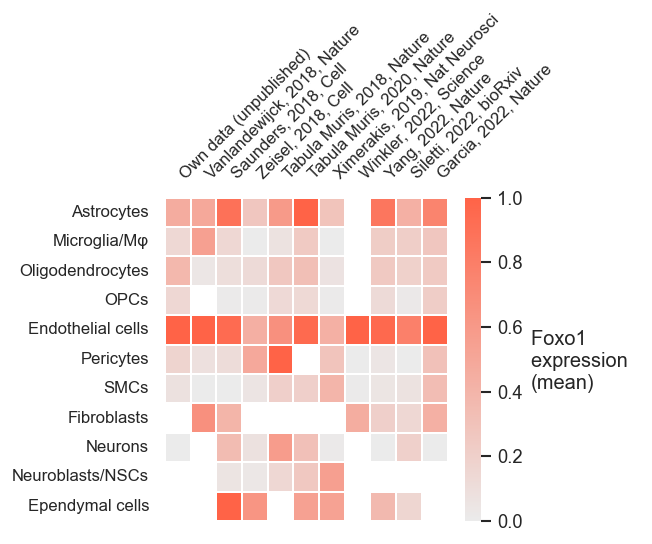

In [398]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.show()

## Dotplot

In [399]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_16740\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [400]:
#all2.columns = ['clusters', 'Mean', 'Fraction of cells', 'gene', 'source','organism', 'cell_number']

In [401]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [402]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [403]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.5,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

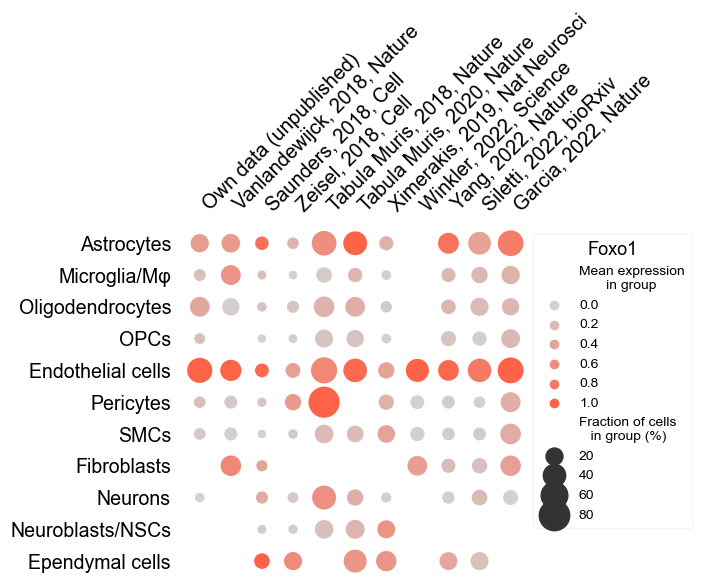

In [404]:
plt.show()

In [604]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_a.png', dpi=500)

In [605]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_a.svg', dpi=500)

In [606]:
# format legend as in scanpy.pl.dotplot() manually
# use colorbar from heatmap above

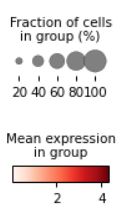

In [607]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(0, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.5,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

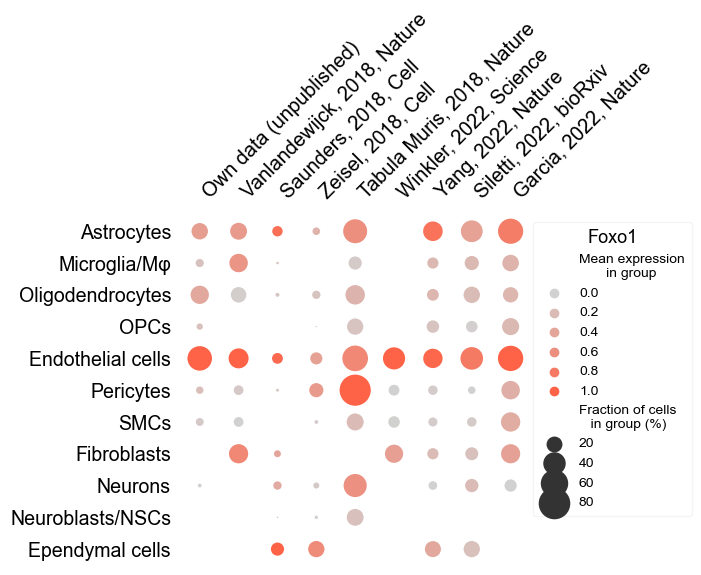

In [608]:
plt.show()

Plot shows no dot if fraction of cells is 0

In [609]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_b.png', dpi=500)

In [610]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_b.svg', dpi=500)

# Other genes: Nos3

In [405]:
gene="Nos3"

## Load data

In [406]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized' 
all_files = glob.glob(os.path.join(path , "*_Nos3_*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230227_Nos3_Vanlandewijck2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_Nos3_Zeisel2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_NOS3_Winkler2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_NOS3_Yang2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230301_Nos3_Heindl2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230301_Nos3_Saunders2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230

In [407]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [408]:
all.source.unique()

array(['Vanlandewijck2018', 'Zeisel2018', 'Winkler2022', 'Yang2022',
       'Heindl2022', 'Saunders2018', 'Siletti2022', 'TabulaMuris2018',
       'Garcia2022', 'TabulaMurisSenis2020', 'Ximerakis2019'],
      dtype=object)

In [409]:
all.clusters.unique().tolist()

['Astrocytes',
 'ECs',
 'Fibroblasts',
 'Microglia',
 'Oligos',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Olfactory ensheathing cells',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Macrophages',
 'OPCs',
 'Leptomeningeal cells',
 'Fibromyocytes',
 'T cells',
 'Immune_Other',
 'Unknown',
 'Neurogenesis',
 'Choroid plexus epithelial cells',
 'Macrophages',
 'Neuronal stem cells',
 'NK/T cells',
 'Neuroepithelial cells',
 'SMCs/Pericytes',
 'Hemoglobin-expressing vascular cells',
 'Hypendymal cells',
 'Neural stem cells',
 'Olfactory ensheathing glia',
 'VLMCs']

## Format

### Remove celltypes

In [410]:
# remove celltypes which are only available in 1 group
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'NK/T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']
all = all[all.clusters != 'Neuroepithelial cells']
all = all[all.clusters != 'VLMCs']
all = all[all.clusters != 'Leptomeningeal cells']
all = all[all.clusters != 'Olfactory ensheathing cells']

In [411]:
all = all[all.clusters != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters != 'Olfactory ensheathing glia']
all = all[all.clusters != 'Hypendymal cells']

### Rename Oligos

In [412]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [413]:
all.clusters.unique().tolist()

['Astrocytes',
 'ECs',
 'Fibroblasts',
 'Microglia',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Macrophages',
 'OPCs',
 'Neurogenesis',
 'Macrophages',
 'Neuronal stem cells',
 'SMCs/Pericytes',
 'Neural stem cells']

In [414]:
all = all.replace("Microglia","Microglia/Mφ")

In [415]:
all = all.replace("Macrophages","Microglia/Mφ")

In [416]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [417]:
all.clusters.unique().tolist()

['Astrocytes',
 'ECs',
 'Fibroblasts',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'OPCs',
 'Neurogenesis',
 'Neuronal stem cells',
 'SMCs/Pericytes',
 'Neural stem cells']

### SMCs/Pericytes

In [418]:
all[all.clusters=="SMCs/Pericytes"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
96,SMCs/Pericytes,0.096688,0.10124,Nos3,TabulaMurisSenis2020,Mouse,484


In [419]:
all = all.replace("SMCs/Pericytes","SMCs") # rather SMCs than pericytes, see TabulaMurisSenis2020 pp script

### Group Neuroblasts/Neuronal stem cells

In [420]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [421]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")
all = all.replace("Neural stem cells","Neuroblasts/NSCs")

In [422]:
all[all.clusters=="Neuroblasts/NSCs"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
13,Neuroblasts/NSCs,0.039580,0.010062,Nos3,Zeisel2018,Mouse,5466
50,Neuroblasts/NSCs,0.017165,0.003743,Nos3,Saunders2018,Mouse,4008
74,Neuroblasts/NSCs,0.014062,0.055556,Nos3,TabulaMuris2018,Mouse,36
92,Neuroblasts/NSCs,0.001044,0.030928,Nos3,TabulaMurisSenis2020,Mouse,97
105,Neuroblasts/NSCs,0.040680,0.018072,Nos3,Ximerakis2019,Mouse,166


### Rename ECs

In [423]:
# rename ECs to Endothelial cells

In [424]:
all2 = all

In [425]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [426]:
all2.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Fibroblasts',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Neurons',
 'Neuroblasts/NSCs',
 'OPCs']

In [427]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "TabulaMurisSenis2020", "Ximerakis2019","Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [428]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [429]:
all2 = all2.sort_values("clusters")

### Rename studies

In [430]:
all2

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
0,Astrocytes,0.000000,0.056000,Nos3,Vanlandewijck2018,Mouse,250
56,Astrocytes,0.001526,0.000803,NOS3,Siletti2022,Human,163066
45,Astrocytes,0.015930,0.003820,Nos3,Saunders2018,Mouse,51571
76,Astrocytes,0.024098,0.032333,Nos3,TabulaMuris2018,Mouse,433
7,Astrocytes,0.038204,0.006581,Nos3,Zeisel2018,Mouse,19755
...,...,...,...,...,...,...,...
8,Ependymal cells,0.238638,0.062016,Nos3,Zeisel2018,Mouse,1419
88,Ependymal cells,0.160962,0.163636,Nos3,TabulaMurisSenis2020,Mouse,55
47,Ependymal cells,0.093670,0.022750,Nos3,Saunders2018,Mouse,2022
100,Ependymal cells,0.171545,0.098540,Nos3,Ximerakis2019,Mouse,274


In [431]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [432]:
all2 = all2.replace("Heindl2022","Own data (unpublished)")

In [433]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [434]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [435]:
all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")

In [436]:
all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")

In [437]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [438]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [439]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [440]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [441]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

## Heatmap

In [442]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [443]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_16740\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


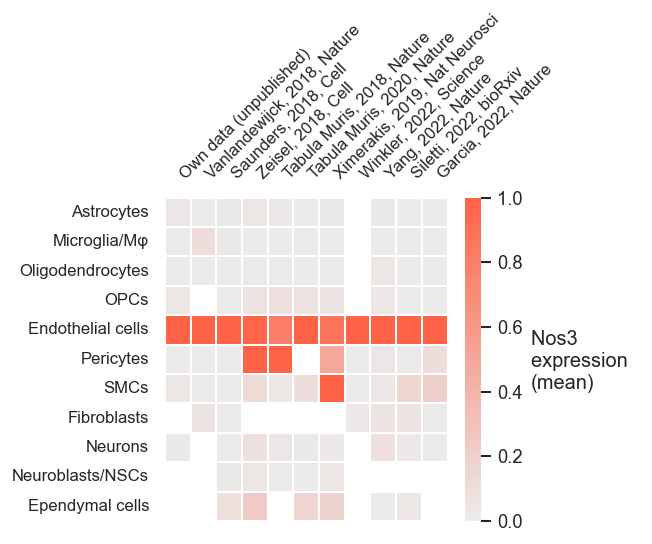

In [444]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.show()

## Dotplot

In [445]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_16740\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [446]:
#all2.columns = ['clusters', 'Mean', 'Fraction of cells', 'gene', 'source','organism', 'cell_number']

In [447]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [448]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [449]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.5,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

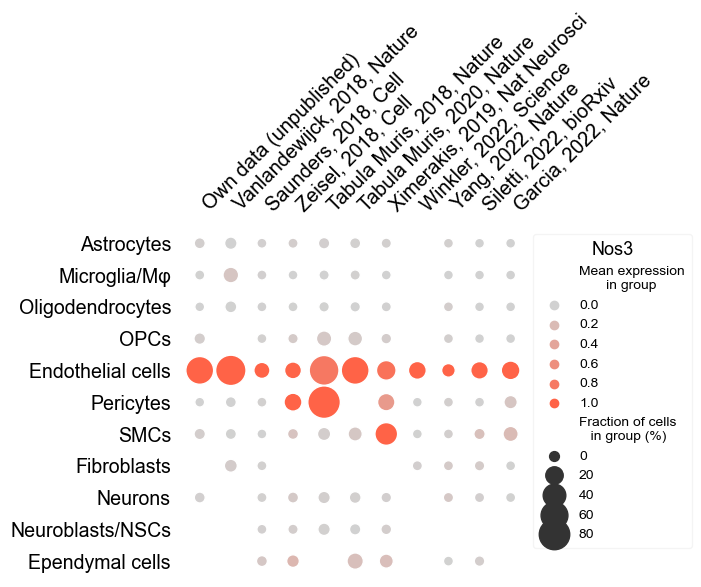

In [450]:
plt.show()

In [656]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_a.png', dpi=500)

In [657]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_a.svg', dpi=500)

In [658]:
# format legend as in scanpy.pl.dotplot() manually
# use colorbar from heatmap above

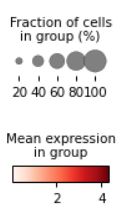

In [659]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(0, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.5,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

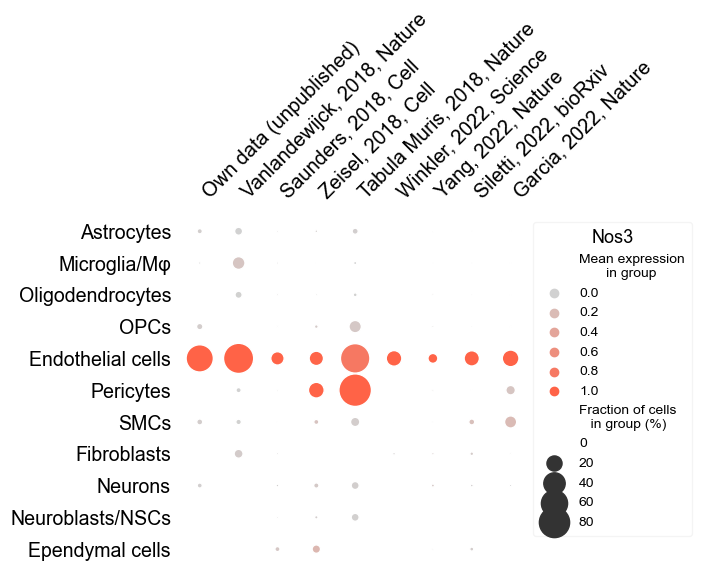

In [660]:
plt.show()

Plot shows no dot if fraction of cells is 0

In [661]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_b.png', dpi=500)

In [662]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_b.svg', dpi=500)

# Session Info

In [663]:
sc.logging.print_versions()

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                         9.2.0
asciitree                   NA
asttokens                   NA
backcall                    0.2.0
beta_ufunc                  NA
binom_ufunc                 NA
bottleneck                  1.3.5
cffi                        1.15.1
cloudpickle                 2.0.0
colorama                    0.4.5
cycler                      0.10.0
cython_runtime              NA
dask                        2022.05.0
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
defusedxml                  0.7.1
entrypoints                 0.4
executing                   0.8.3
fasteners                   0.17.3
fsspec                      2022.3.0
h5py                        3.6.0
hypergeom_ufunc             NA
igraph                      0.9.10
ipykernel                   6.15.2
ipython_genutils            0.2.0
ipywidgets                  7.7.0
jedi                        0.18.1
jinja2 

---
# Export HTML

In [800]:
# Use nbconvert conda env
! cp combine_foxf2_results.ipynb HTMLs/$(date '+%Y%m%d')_combine_foxf2_results.ipynb # rename in temp copy
! jupyter nbconvert HTMLs/$(date '+%Y%m%d')_combine_foxf2_results.ipynb --to html_toc # export
! rm HTMLs/$(date '+%Y%m%d')_combine_foxf2_results.ipynb # delete temp copy

[NbConvertApp] Converting notebook HTMLs/20221104_combine_foxf2_results.ipynb to html_toc
[NbConvertApp] Support files will be in 20221104_combine_foxf2_results_files/
[NbConvertApp] Making directory HTMLs/20221104_combine_foxf2_results_files
[NbConvertApp] Making directory HTMLs/20221104_combine_foxf2_results_files
[NbConvertApp] Making directory HTMLs/20221104_combine_foxf2_results_files
[NbConvertApp] Making directory HTMLs/20221104_combine_foxf2_results_files
[NbConvertApp] Making directory HTMLs/20221104_combine_foxf2_results_files
[NbConvertApp] Writing 401891 bytes to HTMLs/20221104_combine_foxf2_results.html


# Outdated

### Merge EC zonation

In [231]:
# Outdated. Previously used to calculate weighted mean expression on ECs based on data from ECs split into zonation clusters. Now zonation clusters were merged already in anndata object, which is more accurate.

In [232]:
# merge EC zonation as weighted mean expression 
# in Yang2022 Winkler2022 Vanlandewijck2018

In [233]:
#Vanlandewijck2018 = all[all.source == "Vanlandewijck2018"]
#Vanlandewijck2018

In [234]:
# rename
#Vanlandewijck2018["clusters"] = Vanlandewijck2018.loc[:,"clusters"].str.split("_",expand=True)[0].tolist()
#Vanlandewijck2018

In [235]:
#Winkler2022 = all[all.source == "Winkler2022"]
#Winkler2022

In [236]:
# rename
#Winkler2022["clusters"] = Winkler2022.loc[:,"clusters"].str.split("_",expand=True)[0].tolist()
#Winkler2022

In [237]:
# Yang2022 = all[all.source == "Yang2022"]
# Yang2022

In [238]:
# Yang2022["clusters"] = Yang2022.loc[:,"clusters"].str.split("_",expand=True)[0].tolist()
# Yang2022

In [239]:
# remove original rows, then append new ones

In [240]:
# all.loc[Yang2022.index[0]:Yang2022.index[-1],:] = None
# all.loc[Winkler2022.index[0]:Winkler2022.index[-1],:] = None
# all.loc[Vanlandewijck2018.index[0]:Vanlandewijck2018.index[-1],:] = None
# all = all.dropna()

In [241]:
# compute new rows via weighted mean

In [242]:
# wm = lambda x: np.average(x, weights=Yang2022.loc[x.index, "cell_number"])

# # Groupby and aggregate with namedAgg [1]:
# Yang2022_weighted_mean = Yang2022.groupby(["clusters", "gene", "source", "organism"]).agg(cell_number=("cell_number", "sum"),  
#                                                                  mean_expression=("mean_expression", wm),
#                                                                  fraction_of_cells=("fraction_of_cells", wm)
#                                                                 )
# Yang2022_weighted_mean=Yang2022_weighted_mean.reset_index()[Yang2022.columns]
# Yang2022_weighted_mean

Contains correct weighted mean of mean_expression and fraction_of_cell (double checked)

In [243]:
# wm = lambda x: np.average(x, weights=Vanlandewijck2018.loc[x.index, "cell_number"])

# # Groupby and aggregate with namedAgg [1]:
# Vanlandewijck2018_weighted_mean = Vanlandewijck2018.groupby(["clusters", "gene", "source", "organism"]).agg(cell_number=("cell_number", "sum"),  
#                                                                  mean_expression=("mean_expression", wm),
#                                                                  fraction_of_cells=("fraction_of_cells", wm)
#                                                                 )
# Vanlandewijck2018_weighted_mean=Vanlandewijck2018_weighted_mean.reset_index()[Vanlandewijck2018.columns]
# Vanlandewijck2018_weighted_mean

In [244]:
# wm = lambda x: np.average(x, weights=Winkler2022.loc[x.index, "cell_number"])

# # Groupby and aggregate with namedAgg [1]:
# Winkler2022_weighted_mean = Winkler2022.groupby(["clusters", "gene", "source", "organism"]).agg(cell_number=("cell_number", "sum"),  
#                                                                  mean_expression=("mean_expression", wm),
#                                                                  fraction_of_cells=("fraction_of_cells", wm)
#                                                                 )
# Winkler2022_weighted_mean=Winkler2022_weighted_mean.reset_index()[Winkler2022.columns]
# Winkler2022_weighted_mean

In [245]:
# # append to all
# all2 = pd.concat([all, Winkler2022_weighted_mean, Yang2022_weighted_mean, Vanlandewijck2018_weighted_mean], axis=0)
# all2 = all2.reset_index().drop("index",axis=1)

### Complement missing celltypes 

In [106]:
# complement missing celltypes as NA rows

In [107]:
# all_celltypes = pd.Series(all2.clusters.unique())
# for s in all2.source.unique():
#     # find cell types missing per source
#     key_diff = set(all_celltypes).difference(all2[all2.source==s].clusters)
#     where_diff = all_celltypes.isin(key_diff)
#     missing_celltypes=all_celltypes[where_diff]
#     # append these to all2 as NA row
#     for m in missing_celltypes:
#         all2.loc[len(all2)] = [m,None,None,None,s,None,None]

# assert(len(all2) == len(all2.clusters.unique())*len(all2.source.unique()))